<a href="https://colab.research.google.com/github/edwinkuruvila10/CodeSoft/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import  numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Text(0.5, 1.0, 'Sepal Length')

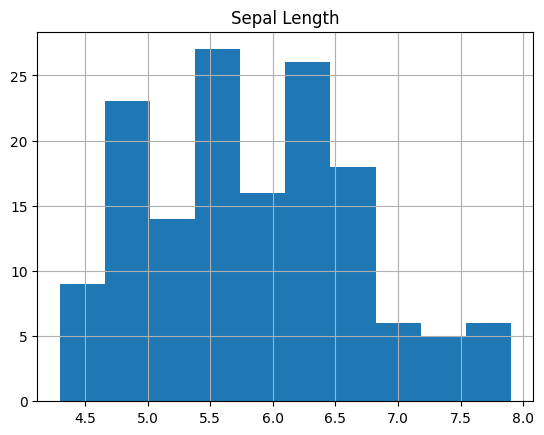

In [8]:
df['sepal_length'].hist()
plt.title('Sepal Length')

Text(0.5, 1.0, 'Sepal Width')

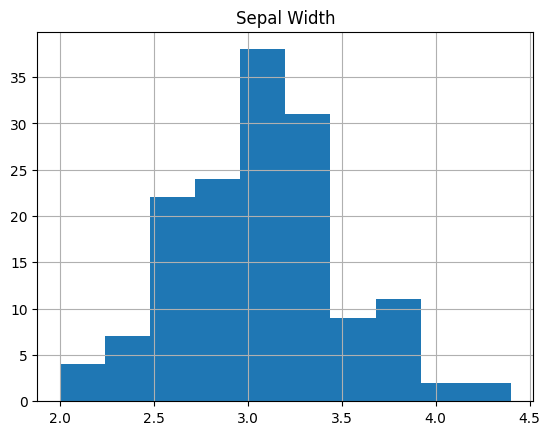

In [9]:
df['sepal_width'].hist()
plt.title('Sepal Width')

Text(0.5, 1.0, 'Petal Length')

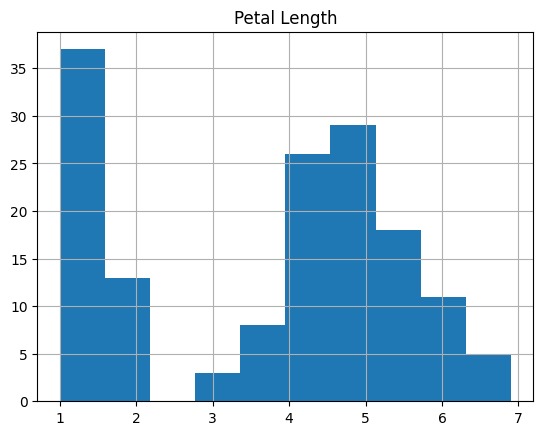

In [10]:
df['petal_length'].hist()
plt.title('Petal Length')

Text(0.5, 1.0, 'Petal Width')

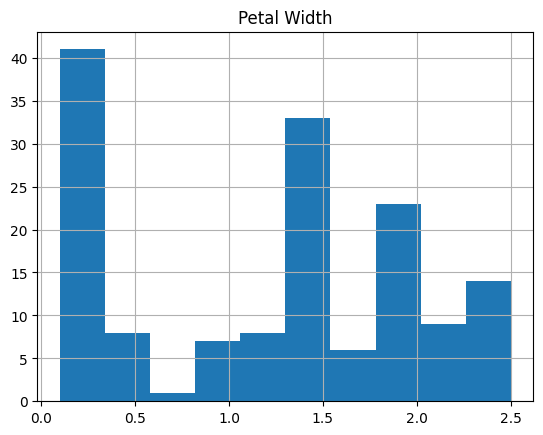

In [11]:
df['petal_width'].hist()
plt.title('Petal Width')

In [12]:
colors=['yellow','green','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

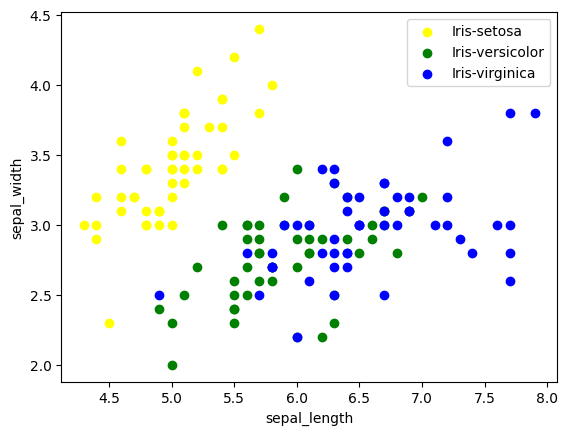

In [13]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

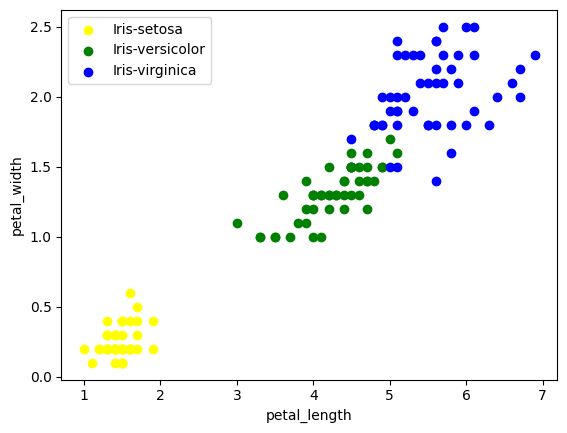

In [14]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

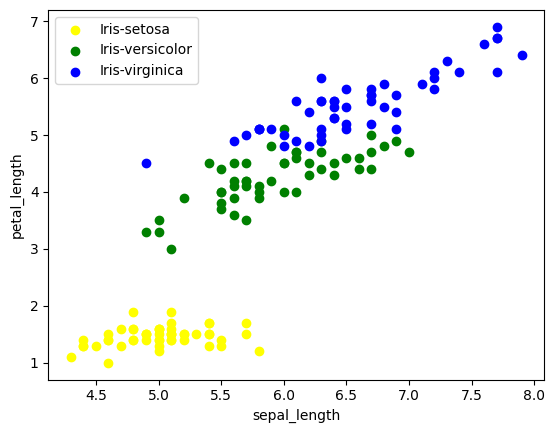

In [15]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

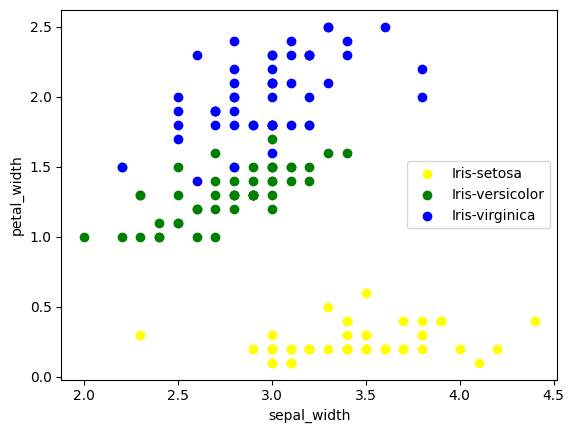

In [16]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

In [19]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

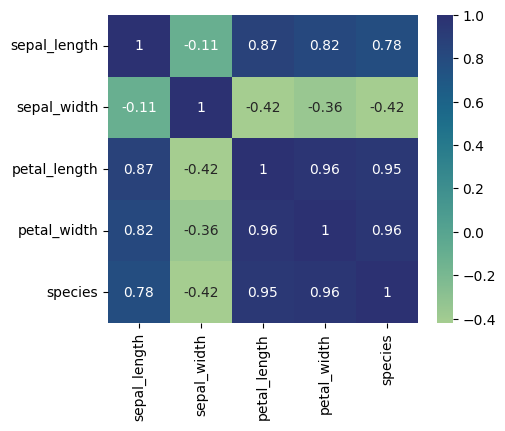

In [21]:
df['species'] = pd.Categorical(df['species'])
df['species'] = df['species'].cat.codes

# Now you can calculate the correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='crest')

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['species'])
Y=df['species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=1000)

In [26]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [28]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [29]:
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 95.55555555555556


In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [31]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 95.55555555555556
